# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)
estado_valvula_co2 =  np.array([])
estado_valvula_compost = np.array([])
temp_suncho = np.array([])
temp_compost = np.array([])
estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/full/2021-09-22_16-41-49"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2,Estado_Valvula_Compost,Temp_Compost,Temp_Suncho,Estado_Suncho
0,22/09/2021_16:41:51,548,Apagado,Prendido,20.87,20.94,Prendido
1,22/09/2021_16:41:57,548,Apagado,Prendido,20.94,21.50,Prendido
2,22/09/2021_16:42:03,548,Apagado,Prendido,20.94,23.06,Prendido
3,22/09/2021_16:42:08,547,Apagado,Prendido,20.94,25.25,Prendido
4,22/09/2021_16:42:14,547,Apagado,Prendido,20.94,27.75,Prendido
5,22/09/2021_16:42:20,546,Apagado,Prendido,20.87,30.44,Prendido
6,22/09/2021_16:42:25,546,Apagado,Prendido,20.94,33.31,Prendido
7,22/09/2021_16:42:31,547,Apagado,Prendido,20.94,36.19,Prendido
8,22/09/2021_16:42:36,547,Apagado,Prendido,20.94,39.19,Prendido
9,22/09/2021_16:42:42,547,Apagado,Prendido,20.87,42.19,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

22/09/2021_16:41:51


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

1


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost = np.concatenate((temp_compost, np.transpose(df["Temp_Compost"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2 = np.concatenate((estado_valvula_co2, np.array([1])))
        else:
            estado_valvula_co2 = np.concatenate((estado_valvula_co2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost = np.concatenate((estado_valvula_compost, np.array([1])))
        else:
            estado_valvula_compost = np.concatenate((estado_valvula_compost, np.array([0])))
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

# Gráficos

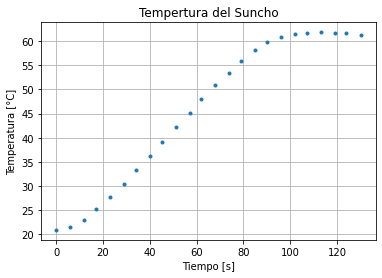

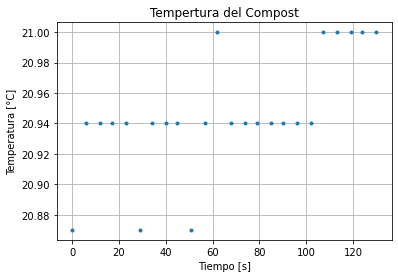

In [8]:
plt.figure("Temperatura del Suncho")
plt.title("Tempertura del Suncho")
plt.plot(tiempos, temp_suncho, ".")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura-del-Suncho.png")
plt.show()

plt.figure("Temperatura del Compost")
plt.title("Tempertura del Compost")
plt.plot(tiempos, temp_compost, ".")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura-del-Compost.png")
plt.show()

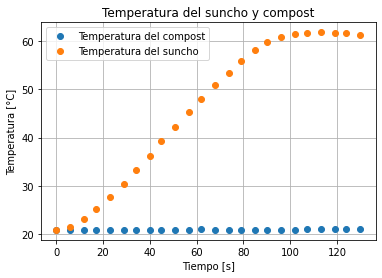

In [9]:
plt.figure("Temperatura del suncho y compost")
plt.title("Temperatura del suncho y compost")
plt.plot(tiempos, temp_compost, "o", label='Temperatura del compost')
plt.plot(tiempos, temp_suncho, "o", label='Temperatura del suncho')
plt.legend()
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura-juntos.png")
plt.show()

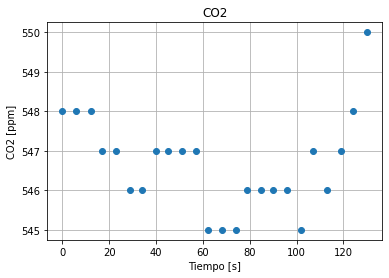

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()